In [22]:
import numpy as np
from sympy import symbols, diff, solve, Matrix, re, im
import matplotlib.pyplot as plt

# Definisikan fungsi f(x1, x2)
def f(x1, x2):
    return x1**4 + 3*x1**3 + 3*x2**2 - 6*x1*x2 - 2*x2

# Rentang nilai x1 dan x2 untuk grid
x1_range = np.linspace(-5, 5, 400)
x2_range = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = f(X1, X2)

# Definisikan simbol untuk x1 dan x2
x1_sym, x2_sym = symbols('x1 x2')

# Hitung gradien dari fungsi f(x1, x2)
grad_f = Matrix([diff(f(x1_sym, x2_sym), x1_sym), 
                 diff(f(x1_sym, x2_sym), x2_sym)])

# Cari titik kritis dengan menyelesaikan gradien sama dengan nol
critical_points = solve(grad_f, (x1_sym, x2_sym), dict=True)

# Filter hanya titik real
real_critical_points = []
for point in critical_points:
    x1_val = point[x1_sym]
    x2_val = point[x2_sym]
    if im(x1_val) == 0 and im(x2_val) == 0:
        real_critical_points.append((float(re(x1_val)), float(re(x2_val))))

# Hitung matriks Hessian
H_matrix = Matrix([
    [diff(grad_f[0], x1_sym), diff(grad_f[0], x2_sym)],
    [diff(grad_f[1], x1_sym), diff(grad_f[1], x2_sym)]
])

# Analisis titik kritis
print("Analisis Titik Kritis:")
for point in real_critical_points:
    x1_val, x2_val = point
    H_eval = H_matrix.subs({x1_sym: x1_val, x2_sym: x2_val})
    H_numeric = np.array(H_eval).astype(np.float64)
    eigenvalues = np.linalg.eigvals(H_numeric)
    
    print(f"\nTitik ({x1_val:.4f}, {x2_val:.4f})")
    print(f"Nilai fungsi: {f(x1_val, x2_val):.4f}")
    print(f"Matriks Hessian:\n{H_numeric}")
    print(f"Nilai eigen: {eigenvalues}")
    
    if all(eig > 0 for eig in eigenvalues):
        print("Type: Local Minimum")
    elif all(eig < 0 for eig in eigenvalues):
        print("Type: Local Maxsimum")
    else:
        print("Type: Saddle Point")


Analisis Titik Kritis:

Titik (-0.2500, 0.0833)
Nilai fungsi: -0.0638
Matriks Hessian:
[[-3.75 -6.  ]
 [-6.    6.  ]]
Nilai eigen: [-6.60582305  8.85582305]
Type: Saddle Point

Titik (0.7321, 1.0654)
Nilai fungsi: -1.9410
Matriks Hessian:
[[19.60769515 -6.        ]
 [-6.          6.        ]]
Nilai eigen: [21.87536023  3.73233492]
Type: Local Minimum

Titik (-2.7321, -2.3987)
Nilai fungsi: -22.7256
Matriks Hessian:
[[40.39230485 -6.        ]
 [-6.          6.        ]]
Nilai eigen: [41.40899564  4.9833092 ]
Type: Local Minimum


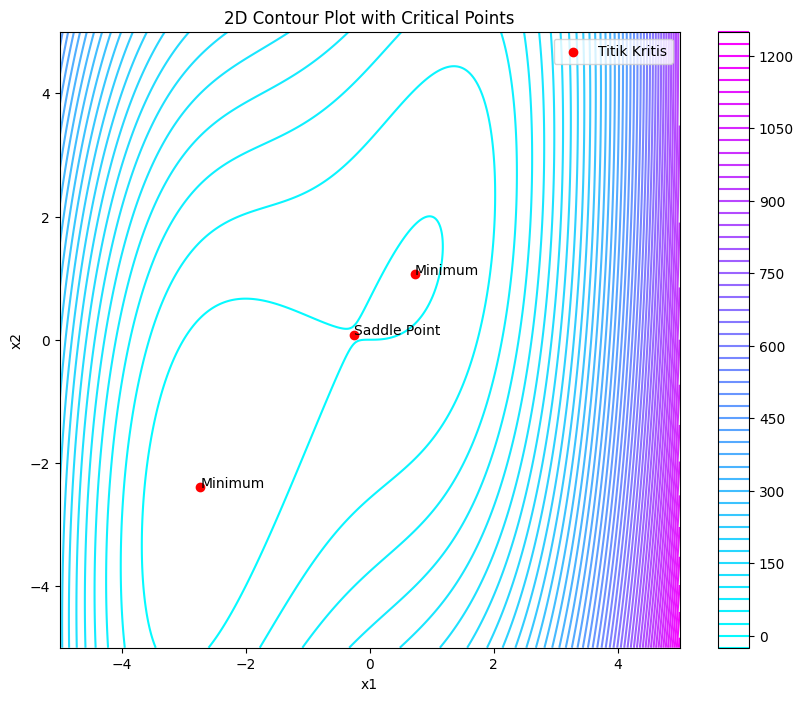

In [24]:
# Buat plot kontur
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Z, levels=50, cmap='cool')
plt.colorbar(contour)

# Tambahkan titik kritis ke plot
for i, point in enumerate(real_critical_points):
    plt.scatter(point[0], point[1], color='red', label='Titik Kritis' if i == 0 else "")
    plt.text(point[0], point[1], f"{optimum_types[i]}", color='black', fontsize=10)

# Tambahkan label dan judul
plt.title('2D Contour Plot with Critical Points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Tampilkan plot
plt.show()

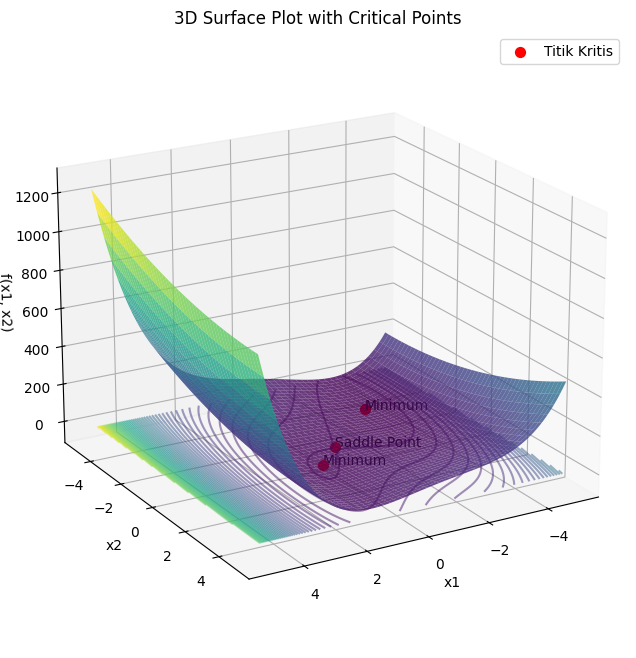

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Buat plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

# Tambahkan titik kritis ke plot
for i, point in enumerate(real_critical_points):
    ax.scatter(point[0], point[1], f(point[0], point[1]), color='red', s=50, label='Titik Kritis' if i == 0 else "")
    ax.text(point[0], point[1], f(point[0], point[1]), f"{optimum_types[i]}", color='black', fontsize=10)

# Tambahkan label dan judul
ax.set_title('3D Surface Plot with Critical Points')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.legend()

# Buat garis kontur pada plot 3D
contour3d = ax.contour(X1, X2, Z, zdir='z', offset=-10, levels=50, cmap='viridis', alpha=0.5)
# Tambahkan garis kontur ke plot 3D
ax.clabel(contour3d, inline=True, fontsize=8)

# Putar gambar agar semua titik terlihat
ax.view_init(elev=20, azim=60)

# Tampilkan plot
plt.show()